<h1> Projet numérique 3 : câble sous-marin</h1>

<h4>VANNIER Clémentine, TARDY Nastassia</h4>
_____________________________________________________________

<h2>Questions théoriques</h2>

**Question n°1.**

>On estime $L$ par $L^{*}=\frac{1}{K} \sum_{k=1}^{K} l_{(k)}$. Ceci est justifié car, par la loi des grands nombres, $\displaystyle \lim_{K \to +\infty}L^{*} = \displaystyle \lim_{K \to +\infty} \frac{1}{K} \sum_{k=1}^{K} l_{(k)} = L$.

**Question n°2.**

>On connaît la valeur exacte de la profondeur $z$ pour les points $x$ dont l'indice $j \in \{j_{1}, ..., j_{n}\}$. Seule la valeur de la profondeur $z$ aux autres indices (sans observation) n'est pas connue. On cherche la loi de $Z_{i \notin \{j_{1}, ..., j_{n}\}} = (y_{1}, ..., y_{n}) | Z_{i \in \{j_{1}, ..., j_{n}\}} = (z(x_{j_{1}}), ..., z(x_{j_{n}}))$.
>
>On note : $A = Z_{i \notin \{j_{1}, ..., j_{n}\}}$ et $B = Z_{i \in \{j_{1}, ..., j_{n}\}}$, avec $a = (y_{1}, ..., y_{n})$ et $b = (z(x_{j_{1}}), ..., z(x_{j_{n}}))$ afin d'alléger l'écriture. On cherche donc la loi de $A = a | B = b$.
>
>Comme $Z = (Z(x_{0}), ..., Z(x_{N}))$ est supposé un vecteur gaussien d'espérance $\mu$ et de matrice de covariance $\Sigma$, on peut appliquer le cours de Probabilité IV. 
>
>On obtient que la variable aléatoire $A = a | B = b$ est gaussienne d'espérance $\mu_{A = a | B = b} = \mu_{A} + \Sigma_{A,B}\Sigma_{B}^{-1}(b - \mu_{B})$ et de matrice de covariance $\Sigma S_{A} = \Sigma_{A} - \Sigma_{A,B}\Sigma_{B}^{-1}\Sigma_{A,B}$, en notant:
>- $\mu_{A} = (\mu, ..., \mu)$ $N - n$ fois
>- $\Sigma = \left(\begin{array}{cc} 
\Sigma_{A} & \Sigma_{A,B}\\
\Sigma_{B,A} & \Sigma_{B}
\end{array}\right)$.


**Question n°3.**

>$Z$ suit une loi normale, car c'est une combinaison linéaire de variables aléatoires suivant toutes une loi normale.
>
>De plus, $E(Z) = E(m + RY) = m$, et $V(Z) = RR^{T}V(Y) = RR^{T}$.
>
>$Z$ suit donc une loi gaussienne d'espérance $m$ et de variance $RR^{T}$.


**Question n°4.**

>On en déduit l'algorithme suivant : 
>
>>On suppose qu'un tableau $T$ de profondeur est donné.
>>
>>>On veut obtenir $K$ séries de valeurs.
>>>
>>>On simule des valeurs pour $Z$, sachant les valeurs données dans le tableau $T$.
>>
>>En utilisant la formule $l_{(j)} = \sum_{i=1}^{j} \sqrt{\Delta^{2} + (z(x_{i})-z(x_{i-1}))^{2}}$, on obtient les $(l_{(1)},...,l_{(k)})$. 
>>
>>Puis : $L^{*} = \frac{1}{K} \sum_{k=1}^{K} l_{(k)}$.
>
>
>L'étape de simulation des valeurs pour $Z$ est délicate. On la développe ici. 
>
>On cherche à simuler la loi conditionnelle de $A|B$ de la question 2.
>
>

<h2>Implémentation</h2>

**Question n°1.**

In [2]:
# Chargement de dépendances
import numpy as np
import math
import matplotlib.pyplot as plt

# Discrétisation
A = 0
B = 500
N = 101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

# Paramètres du modèle
mu = -5
a = 50
sigma2 = 12

# Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

# Indices des composants correspondant aux observations et aux composantes non observées
unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))


def C(h, a , sigma2):
    """
    fonction décroissante C, traduit le fait que deux points géographiquement proches ont 
    tendance à avoir des profondeurs plus similaires que deux points éloignés
    """
    return sigma2*np.exp(-abs(h)/a)

def covariance(d, a, sigma2):
    """
    Si d est un nombre, on renvoie la covariance entre deux points.
    Si d est une matrice, on renvoie la matrice de covariance.
    """
    if type(d)==float or type(d)==int:
        return C(d, a, sigma2)
    
    elif type(d)==np.ndarray:
        (n,p) = np.shape(d)
        Cov = np.zeros((n,p))
        for i in range (n):
            for j in range (p):
                Cov[i,j] = sigma2*np.exp(-abs(d[i,j])/a)
        return Cov
    
# Test pour un nombre
print(C(-2.1, a, sigma2))
print(covariance(-2.1, a, sigma2))

11.506437366869815
11.506437366869815


**Question n°2.**

In [3]:
Distance = np.zeros((N,N))
for i in range (N):
    for j in range (N):
        Distance[i,j] = abs(discretization[i] - discretization[j])  
        
print("Distance =", Distance)
# On remarque que la diagonale  est bien nulle, et que la matrice est bien symétrique.

Distance = [[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


**Question n°3.**

In [4]:
S = covariance(Distance, a, sigma2)
print("S =", S)

S = [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


**Question n°4.**

In [5]:
n = len(observation_indexes) # nombre d'indices que l'on connaît

S_A = np.zeros((N-n, N-n)) # entre les inconnues
S_B = np.zeros((n, n)) # entre les observations
S_BA = np.zeros((n, N-n)) # entre les observations et les inconnues
S_AB = np.zeros((N-n, n)) # entre les inconnues et les observations

# extraction de S_B
tmp_i = 0
tmp_j = 0
for i in observation_indexes:
    for j in observation_indexes:
        S_B[tmp_i, tmp_j] = S[i, j]
        tmp_j += 1
    tmp_i += 1
    tmp_j = 0

# extraction de S_A
tmp_i = 0
tmp_j = 0
for i in unknown_indexes:
    for j in unknown_indexes:
        S_A[tmp_i, tmp_j] = S[i,j]
        tmp_j += 1
    tmp_i += 1
    tmp_j = 0

# extraction de S_BA
tmp_i = 0
tmp_j = 0
for i in observation_indexes:
    for j in unknown_indexes:
        S_BA[tmp_i, tmp_j] = S[i,j]
        tmp_j += 1
    tmp_i += 1
    tmp_j = 0
    
# extraction de S_AB
tmp_i = 0
tmp_j = 0
for i in unknown_indexes:
    for j in observation_indexes:
        S_AB[tmp_i, tmp_j] = S[i,j]
        tmp_j += 1
    tmp_i += 1
    tmp_j = 0

print("S_B = ", S_B)
print("S_A = ", S_A)
print("S_BA = ", S_BA)

# test
print("Les deux matrices précédentes devraient être la transposée l'une de l'autre :")
print(S_AB == S_BA.T)

S_B =  [[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
S_A =  [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221959e-04 9.92688787e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [7.35401941e-

**Question n°5.**

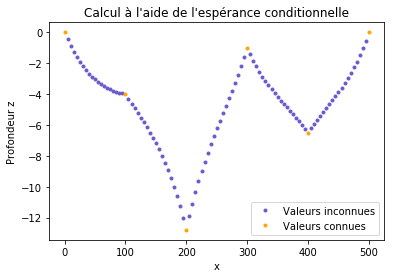

In [6]:
mu_A = np.array([mu]*(N-n))
mu_B = np.array([mu]*(n))

def esp_cond(mu_A, S_AB, S_B, b, mu_B):
    S_B_inv = np.linalg.inv(S_B)
    M = np.dot(S_AB, S_B_inv)
    N = np.dot(M, b-mu_B)
    return (mu_A + N)

E_Cond = esp_cond(mu_A, S_AB, S_B, depth, mu_B)

plt.figure()
plt.plot(np.array(unknown_indexes)*Delta, E_Cond,'.', color = 'slateblue', label = "Valeurs inconnues")
plt.plot(np.array(observation_indexes)*Delta, depth, '.', color = 'orange', label = "Valeurs connues")
plt.title("Calcul à l'aide de l'espérance conditionnelle")
plt.ylabel("Profondeur z")
plt.xlabel("x")
plt.legend()
plt.show()


**Question n°6.**

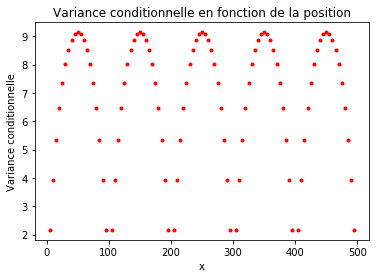

In [7]:
def mat_cov_cond(S_A, S_AB, S_B, S_BA):
    S_B_inv = np.linalg.inv(S_B)
    M = np.dot(S_AB, S_B_inv)
    N = np.dot(M, S_BA)
    return S_A - N

M = mat_cov_cond(S_A, S_AB, S_B, S_BA)
(l,m) = np.shape(M)
Diag = []
for k in range (l):
    Diag.append(M[k,k])

plt.figure()
plt.plot(np.array(unknown_indexes)*Delta, Diag,'.', color = 'red')
plt.title("Variance conditionnelle en fonction de la position")
plt.ylabel("Variance conditionnelle")
plt.xlabel("x")
plt.show()

L'incertitude est d'autant plus élevée que le point est loin de la valeur certaine. 

Ceci est cohérent.

**Question n°7.**

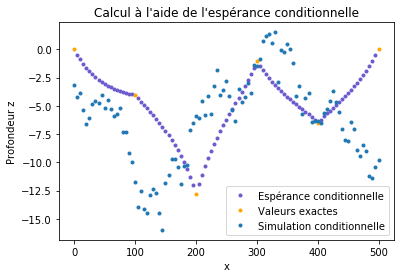

In [8]:
L = np.linalg.cholesky(S)

Mu = np.zeros((N, 1))
for i in range (N):
    Mu[i,0] = mu

# simulation de Y, un vecteur de variables aléatoires 
# gaussiennes centrées, réduites et indépendantes :
import random as rd
Y = np.zeros((N, 1))
for i in range (N):
    Y[i] = rd.gauss(0,1)

Z = Mu + np.dot(L,Y)

plt.figure()
plt.plot(np.array(unknown_indexes)*Delta, E_Cond,'.', color = 'slateblue', label="Espérance conditionnelle")
plt.plot(np.array(observation_indexes)*Delta, depth, '.', color = 'orange', label="Valeurs exactes")
plt.plot(discretization, Z, '.', label="Simulation conditionnelle")
plt.title("Calcul à l'aide de l'espérance conditionnelle")
plt.ylabel("Profondeur z")
plt.xlabel("x")
plt.legend()
plt.show()


Comme on n'impose pas à Z les valeurs connues, et que les variables aléatoires sont indépendantes entre elles, il est normal d'obtenir quelque chose de très éloigné d'une réalité potentielle.

On peut cependant remarquer une certaine cohérence, liée à la matrice de covariance S. 

**Question n°8.**

In [9]:
def calcul_longueur(z, Delta):
    L = 0
    N = len(z)
    for i in range (N-1):
        L += np.sqrt(Delta**2 + (z[i+1]-z[i])**2)
    return(L)

**Question n°9.**

In [28]:
L = np.linalg.cholesky(S)

Mu = np.zeros((N, 1))
for i in range (N):
    Mu[i,0] = mu

def simulation_longueur(K):
    Liste = []
    Sum = 0
    for it in range (K):
        # Simulation du vecteur
        Y = np.zeros((N, 1))
        for i in range (N):
            Y[i] = rd.gauss(0,1)
        Z = Mu + np.dot(L,Y)
        # calcul de la longueur correspondante
        c = calcul_longueur(Z, Delta)[0]
        Liste.append(c)
        Sum += c
    return Sum/K , Liste

print(simulation_longueur(100)[0])   


521.3457247679896


In [29]:
# Calcul de la longueur à l'aide de l'espérance conditionnelle

# Reconstitution du vecteur des profondeurs
Z_esp_cond = []
tmp = 0
for k in range (N):
    if k%20==0:
        Z_esp_cond.append(depth[k//20])
    else:
        Z_esp_cond.append(E_Cond[tmp])
        tmp += 1

# Estimation de la longueur
L_estimee = calcul_longueur(Z_esp_cond, Delta)
print(L_estimee)

501.6468416918411


**Question n°10.**

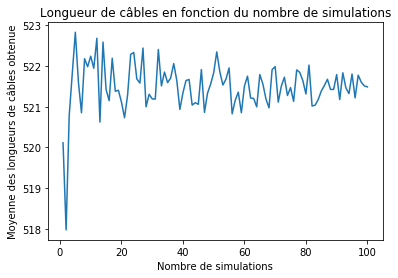

In [44]:
Liste_longueur = [simulation_longueur(i)[0] for i in range(1,101)]
    
def affiche_longueur(L):
    abscisses=[i for i in range(1,len(L)+1)]
    plt.figure()
    plt.plot(abscisses, L)
    plt.title("Longueur de câbles en fonction du nombre de simulations")
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyenne des longueurs de câbles obtenue")
    plt.show()

affiche_longueur(Liste_longueur)

La suite des moyennes semble bien converger vers une valeur de longueur donnée. Ceci est cohérent. 

**Question n°11.**

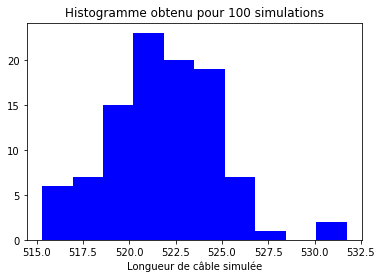

In [49]:
L100 = simulation_longueur(100)[1]

def histogramme(L) :
    NB = len(L)
    num_bins = min(int(np.sqrt(NB)), 100)
    ax = plt.gca()
    n, bins, patches = ax.hist(L, num_bins, facecolor='blue')
    ax.set_xlabel("Longueur de câble simulée")
    ax.set_title(f"Histogramme obtenu pour {NB} simulations")

histogramme(L100)

**Question n°12.**

In [38]:
n = 100
X = simulation_longueur(n)[1]
esp = simulation_longueur(n)[0]

ecart_type = 0
for i in range(n):
    ecart_type += ( X[i] - esp) ** 2
ecart_type = ( ecart_type / n ) ** 0.5

val_crit = 1.96 # trouvée dans les tables de valeurs critiques, ici on veut un intervalle à 95% donc val_crit = 1.96

marge = val_crit * ecart_type / (n ** 0.5)

print("L'interval de confiance à 95% est: [" + str( (esp - marge) ) + ", " + str( (esp + marge) ) + "]")

L'interval de confiance à 95% est: [521.1395643889828, 522.3476105099444]


**Question n°13.**

In [34]:
n = 50000
sim = simulation_longueur(n)[1]
Nb_fav = 0
for l in sim:
    if l > 525:
        Nb_fav += 1
    
print("la probabilité que la longueur de câble dépasse 525 vaut approximativement " + str( Nb_fav / n))

la probabilité que la longueur de câble dépasse 525 vaut approximativement 0.11914


**Question n°14.**

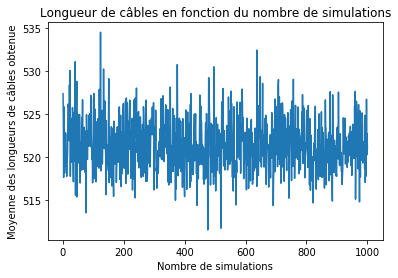

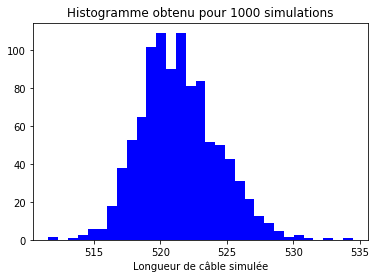

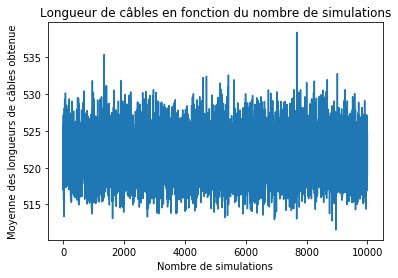

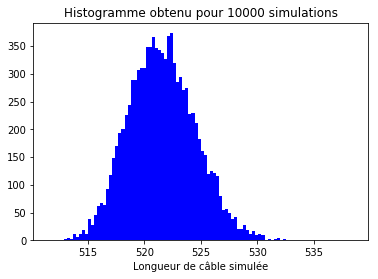

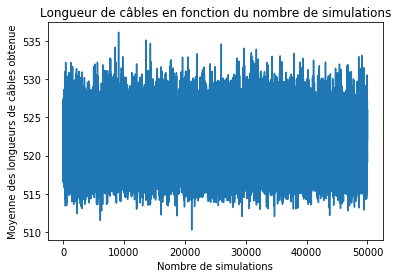

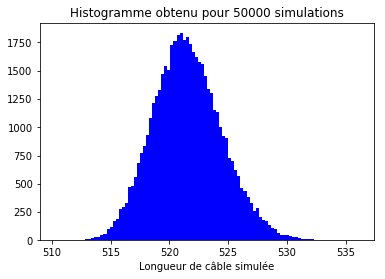

In [48]:
L1 = simulation_longueur(1000)
L2 = simulation_longueur(10000)
L3 = simulation_longueur(100000)
H = [L1[1], L2[1], L3[1]]

for i in range(3) :
    affiche_longueur(H[i])
    histogramme(H[i])